In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scikitplot as skplt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

In [3]:
data = pd.read_csv("data.csv", header=None)

In [4]:
data1 = data.fillna(data.mean())

In [5]:
X = data1.iloc[:,0:3119]
y = data1[3120]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
n = 2
pca = PCA(n_components=n)
X_train = pca.fit_transform(X_train)


In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X_train, Y_train)


In [8]:
def preprocess1(x):
    pca = PCA(n_components=n)
    x = pca.fit_transform(x)
    scaler = MinMaxScaler()
    scaler.fit(x)
    x_scaled = scaler.transform(x)
    return x_scaled

In [9]:
X_train_p1 = preprocess1(X_sm)
X_test_p1 = preprocess1(X_test)

In [10]:
clf = MultinomialNB()
clf.fit(X_train_p1, y_sm)
predictions = clf.predict(X_test_p1)
print("accuracy=", accuracy_score(predictions, Y_test))

accuracy= 0.6871165644171779


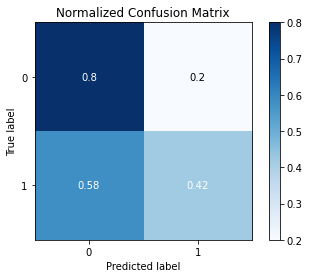

In [11]:
skplt.metrics.plot_confusion_matrix(Y_test, predictions, normalize=True)

d:\users\hans tananda\.virtualenvs\compsci_361_ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


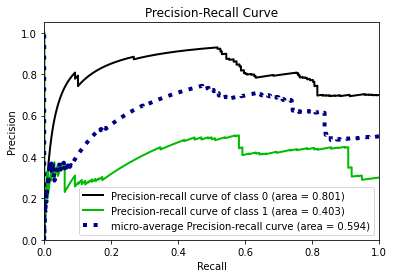

In [12]:
skplt.metrics.plot_precision_recall_curve(Y_test, clf.predict_proba(X_test_p1))
plt.show()